In [1]:
import os
import numpy as np
import pandas as pd
import time as tm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("visa_alltime.csv")
df['time']=pd.to_datetime(df['time'])
df['month'] = [t.strftime("%B") for t in df['time']]
df['year'] = [t.strftime("%Y") for t in df['time']]
df['count_sqrt'] = np.sqrt(df['count'])
df['count_log'] = np.log(df['count']+0.001)

In [15]:
df.iloc[df['count'].idxmax()]

nationality                 MEXICO
visa                         BBBCC
count                       205108
time           2025-01-31 00:00:00
type                             N
month                      January
year                          2025
count_sqrt              452.888507
count_log                12.231292
Name: 487009, dtype: object

In [4]:
df_agg_visa=df.pivot_table(
    index = ['year','type','nationality'], 
    values = 'count', 
    aggfunc = 'sum').reset_index()

In [5]:
df_agg_visa.head()

,year,type,nationality,count
0,2017,I,AFGHANISTAN,14430
1,2017,I,ALBANIA,3360
2,2017,I,ALGERIA,1478
3,2017,I,ANGOLA,55
4,2017,I,ANGUILLA,10


# Univariate Distribution

## `sns.stripplot()`

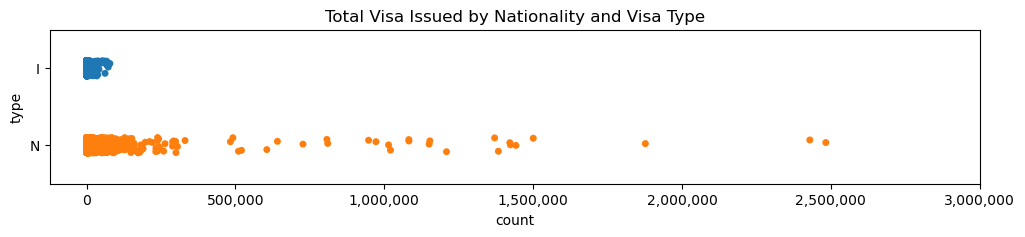

In [33]:
plt.figure(figsize=(12, 2))
plt.ticklabel_format(style='plain')
sns.stripplot(data=df_agg_visa, x="count", y="type", jitter=True, orient="h", hue = "type")
current_values = plt.gca().get_xticks() # extract the default ticks
# count is non-negative, filter out negative values in the array
plt.xticks(current_values[current_values>=0]) # add this step to avoid warning
# consistently reflect the non-negative count x-ticks in their formats
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values[current_values>=0]])
plt.title("Total Visa Issued by Nationality and Visa Type")
plt.show()

In [32]:
current_values[current_values>=0]

array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
       3000000.])

## Histogram

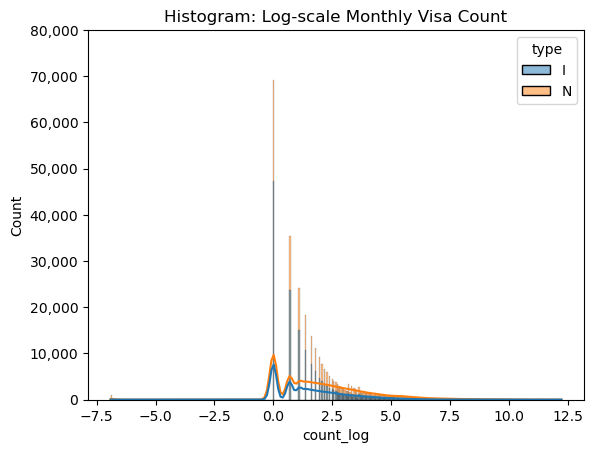

In [25]:
sns.histplot(data = df, x = 'count_log', kde=True, hue = "type")
current_values = plt.gca().get_yticks()
plt.yticks(current_values) # add this step to avoid warning
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Histogram: Log-scale Monthly Visa Count')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488523 entries, 0 to 488522
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nationality  488523 non-null  object        
 1   visa         488523 non-null  object        
 2   count        488523 non-null  int64         
 3   time         488523 non-null  datetime64[ns]
 4   type         488523 non-null  object        
 5   month        488523 non-null  object        
 6   year         488523 non-null  object        
 7   count_sqrt   488523 non-null  float64       
 8   count_log    488523 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 33.5+ MB


In [37]:
df.nationality.unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS, THE', 'BAHRAIN',
       'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN',
       'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRITISH VIRGIN ISLANDS', 'BULGARIA',
       'BURKINA FASO', 'BURMA', 'BURUNDI', 'CABO VERDE', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAYMAN ISLANDS', 'CENTRAL AFRICAN REPUBLIC',
       'CHAD', 'CHILE', 'CHINA', 'TAIWAN', 'COLOMBIA', 'COMOROS',
       'CONGO, DEMOCRATIC REPUBLIC OF THE', 'CONGO, REPUBLIC OF THE',
       'COSTA RICA', "COTE D'IVOIRE", 'CROATIA', 'CUBA', 'CURACAO',
       'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EL SALVADOR',
       'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA', 'ETHIOPIA', 'FIJI',
       'FINLAND', 'FRANCE', 'GABON', 'GAMBIA, THE', '

In [39]:
spain=df.loc[df['nationality'] == 'SPAIN']

In [40]:
spain.head()

,nationality,visa,count,time,type,month,year,count_sqrt,count_log
2076,SPAIN,CR1,9,2017-03-31,I,March,2017,3.000000,2.197336
2077,SPAIN,CR2,3,2017-03-31,I,March,2017,1.732051,1.098946
2078,SPAIN,DV1,2,2017-03-31,I,March,2017,1.414214,0.693647
2079,SPAIN,DV2,2,2017-03-31,I,March,2017,1.414214,0.693647
2080,SPAIN,DV3,3,2017-03-31,I,March,2017,1.732051,1.098946


## `sns.violinplot()` is picky about distribution!

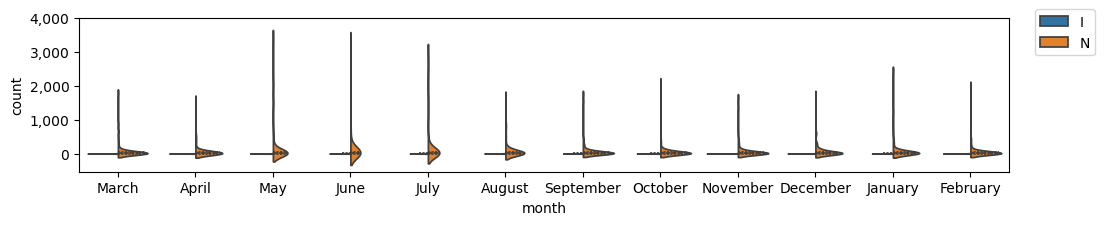

In [63]:
plt.figure(figsize=(12, 2))
plt.ticklabel_format(style='plain')
sns.violinplot(data=spain, x="month", y="count", hue="type", split=True, inner="quart")
plt.legend(loc = 'best',bbox_to_anchor=(1.1, 1.1)) # push the legend outside
current_values = plt.gca().get_yticks()
plt.yticks(current_values[current_values >=0]) # add this step to avoid warning
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values[current_values >=0]])
plt.show()

In [ ]:
# tbc